In [1]:
pip install scikit-rmt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.3/82.3 kB 752.2 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 48.0 MB/s eta 0:00:00
  Created wheel for scikit-rmt: filename=scikit_rmt-1.0.0-py3-none-any.whl size=77937 sha256=1a54a2173cf3f558bbf462292ae8f51c881d9e40ee45c93e6328bf5400f50ee4
  Stored in directory: /root/.cache/pip/wheels/20/0e/76/2bc3a81963287710208aab8d51afbc1f93fdc5a721194ba8cc
Successfully built scikit-rmt
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.2
    Uninstalling numpy-1.25.2:
      Successfully uninstalled numpy-1.25.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-stubs 2.0.3.230814 requires numpy>=1.25.0; python_version >= "3.9", but you have numpy 1.24.3 which is incompatible.


In [1]:
import numpy as np
import numpy.linalg as nlg
import scipy as sc
from scipy.spatial import cKDTree
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
from timeit import default_timer as timer
from skrmt.ensemble import CircularEnsemble

In [15]:
############## Circular orthogonal ensemble ####################
n = 4
# Generate a matrix from the COE
coe = CircularEnsemble(beta=1, n = n)
Hcoe = coe.matrix
eig = nlg.eigvals(Hcoe)
eigph = np.angle(eig)
eigso = np.sort(eigph)
print(Hcoe)

[[ 0.66357594+0.34228089j  0.17951159+0.23747911j -0.10096043+0.53054938j
   0.21408341+0.12799477j]
 [ 0.17951159+0.23747911j  0.47459835-0.58793724j -0.34599093-0.25040394j
   0.01308372-0.39734422j]
 [-0.10096043+0.53054938j -0.34599093-0.25040394j  0.58296745+0.10585937j
   0.24691669-0.33747205j]
 [ 0.21408341+0.12799477j  0.01308372-0.39734422j  0.24691669-0.33747205j
   0.05034616+0.77610698j]]


In [19]:
Hcoet = np.conj(Hcoe).T

In [24]:
U = np.matmul(Hcoet,Hcoe)

In [37]:
def chop(expr, delta=10**-10):
  return np.ma.masked_inside(expr, -delta, delta).filled(0)

Checking for unitarity of the COE matrix

In [27]:
chop(U)

array([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j]])

In [16]:
eigph

array([-1.36289627, -0.08809392,  0.79192889,  1.70470999])

In [28]:
############## Circular unitary ensemble ####################
n = 4
# Generate a matrix from the CUE
cue = CircularEnsemble(beta=2, n = n)
Hcue = cue.matrix
eig = nlg.eigvals(Hcue)
eigph = np.angle(eig)
eigso = np.sort(eigph)
print(Hcue)

[[-0.5559732 -0.36038939j  0.44914622-0.09449405j  0.03612757-0.19755887j
  -0.12198037+0.54326598j]
 [ 0.09756702-0.40585953j -0.71341486+0.00666012j -0.11425349+0.07342883j
   0.21178965+0.50344125j]
 [ 0.01908559+0.27603943j  0.16027186+0.16820782j -0.14406689+0.82459833j
  -0.18301806+0.36775502j]
 [-0.15069565+0.53619101j -0.31552874+0.3560816j   0.35470629-0.33865235j
  -0.36889425+0.29470763j]]


In [29]:
chop(np.matmul(Hcue,np.conj(Hcue).T))

array([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j]])

In [40]:
############## Circular unitary ensemble ####################
n = 2
# Generate a matrix from the CUE
cse = CircularEnsemble(beta = 4, n = n)
Hcse = cse.matrix
eig = nlg.eigvals(Hcse)
eigph = np.angle(eig)
eigso = np.sort(eigph)
print(Hcse)

[[-9.77477252e-01-7.72376070e-01j -2.73685689e-17+3.46944695e-18j
  -3.95241745e-01+5.62808403e-02j  6.48748402e-01-3.06667514e-01j]
 [ 2.30394747e-01-2.75820421e-01j -5.82235506e-01-8.28656911e-01j
   2.30394747e-01-2.75820421e-01j -6.21554159e-01-1.98069409e-01j]
 [ 8.34778629e-01+1.10648712e+00j -6.48748402e-01+3.06667514e-01j
   8.74097281e-01+4.75899621e-01j -6.48748402e-01+3.06667514e-01j]
 [-2.30394747e-01+2.75820421e-01j -3.95241745e-01+5.62808403e-02j
   1.34954002e-17+0.00000000e+00j  4.78855536e-01+5.32180461e-01j]]


In [38]:
chop(np.matmul(Hcse,np.conj(Hcse).T))

array([[ 2.5408693 -2.22300297e-17j, -0.75727197+4.84381246e-01j,
        -2.02735736-2.64561207e-01j, -0.27964851-6.12767243e-01j,
        -0.15916337-2.97394471e-01j,  0.50428854+3.04801330e-01j],
       [-0.75727197-4.84381246e-01j,  3.02382261-2.18125291e-17j,
         1.45960027+6.61603239e-01j, -1.84064639+2.06516657e-01j,
        -0.5271548 -3.27983403e-01j,  0.2309679 -3.47054862e-01j],
       [-2.02735736+2.64561207e-01j,  1.45960027-6.61603239e-01j,
         3.67517833-1.48170993e-17j, -0.42498459+1.79011182e+00j,
        -1.80659533+8.19167452e-01j, -0.3632992 -1.25925106e+00j],
       [-0.27964851+6.12767243e-01j, -1.84064639-2.06516657e-01j,
        -0.42498459-1.79011182e+00j,  3.34969688-4.21823682e-17j,
         0.88732112+1.31834892e+00j, -1.41109844+2.16751720e-01j],
       [-0.15916337+2.97394471e-01j, -0.5271548 +3.27983403e-01j,
        -1.80659533-8.19167452e-01j,  0.88732112-1.31834892e+00j,
         2.90104944+0.00000000e+00j, -0.54294839+1.26165859e+00j],
     

Eigenphase, eigenvalue and ratio of spacings of the eigenphases for the COE

In [2]:
############## Circular orthogonal ensemble ####################
n = 200
ens = 1000  # ens
eigphall = []
eigvals = []
spacing_ratios = []
# Generate a matrix from the CUE
for i in tqdm(range(ens)):
    coe = CircularEnsemble(beta=1, n = n)
    Hcoe = coe.matrix
    eig = nlg.eigvals(Hcoe)
    eigph = np.angle(eig)
    eigso = np.sort(eigph)
    for j in range(len(eig)-2):
    #spacings = np.diff(eigs)
        sratio = (eigso[j+2]-eigso[j+1])/(eigso[j+1]-eigso[j])
        spacing_ratios.append(sratio)
    eigvals.append(eig)
    eigphall.append(eigph)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [3]:
e1 = np.array(eigvals).flatten()
e2 = np.array(eigphall).flatten()

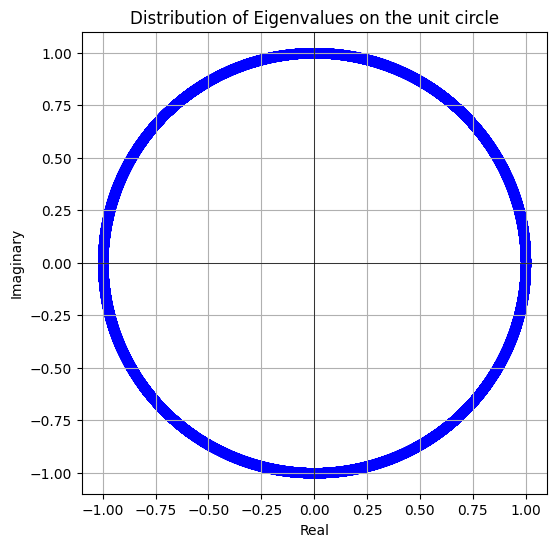

In [4]:
plt.figure(figsize=(6, 6))
plt.scatter(np.real(e1), np.imag(e1), color='blue', alpha=0.2)
plt.title(f"Distribution of Eigenvalues on the unit circle")
plt.xlabel("Real")
plt.ylabel("Imaginary")
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid()
plt.show()

In [41]:
################################# RMT results of ratios of consecutive level spacings ############################
x = np.linspace(0, 10, 1000)
prgoe = 27*x*(x+1)/(8*(x** 2 + x + 1)**(5/2))
prgue = 81*np.sqrt(3)*x**2*(x+1)**2/(4*np.pi*(x ** 2 + x + 1)**(4))
prgse = 729*np.sqrt(3)*x**4*(x+1)**4/(4*np.pi*(x ** 2 + x + 1)**(7))
prpoi = 1/(x+1)**2

Eigenphase distribution of the COE

(array([0.31623942, 0.32120854, 0.3140734 , 0.32095371, 0.30999618,
        0.32108112, 0.3199344 , 0.31751355, 0.32757919, 0.31177996,
        0.31560236, 0.31802321, 0.32311973, 0.31394599, 0.32057147,
        0.31955216, 0.32018923, 0.32018923, 0.31878769, 0.3140734 ,
        0.32146336, 0.31751355, 0.3150927 , 0.31980699, 0.32350197,
        0.31522012, 0.31496529, 0.32095371, 0.31649425, 0.32311973,
        0.31330892, 0.31547494, 0.32018923, 0.3237568 , 0.31547494,
        0.31611201, 0.31789579, 0.32146336, 0.32108112, 0.3150927 ]),
 array([-1.57079633, -1.49225651, -1.41371669, -1.33517688, -1.25663706,
        -1.17809725, -1.09955743, -1.02101761, -0.9424778 , -0.86393798,
        -0.78539816, -0.70685835, -0.62831853, -0.54977871, -0.4712389 ,
        -0.39269908, -0.31415927, -0.23561945, -0.15707963, -0.07853982,
         0.        ,  0.07853982,  0.15707963,  0.23561945,  0.31415927,
         0.39269908,  0.4712389 ,  0.54977871,  0.62831853,  0.70685835,
         0.78539

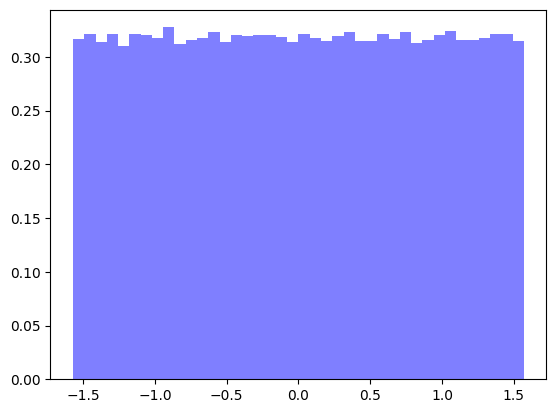

In [6]:
plt.hist(e2,range = [-np.pi/2,np.pi/2],  bins=40, density=True, alpha=0.5, color='blue')

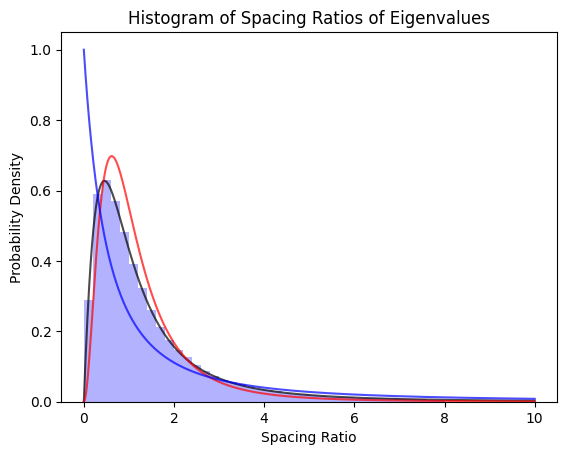

In [7]:
# Plot the spacing ratios
plt.hist(spacing_ratios,range = [0,8],  bins=40, density=True, alpha=0.3, color='blue')
plt.plot(x,prgoe,alpha=0.7, color='black')
plt.plot(x,prgue,alpha=0.7, color='red')
plt.plot(x,prpoi,alpha=0.7, color='blue')
plt.xlabel('Spacing Ratio')
plt.ylabel('Probability Density')
plt.title('Histogram of Spacing Ratios of Eigenvalues')
plt.grid(False)
plt.show()

Eigenphase, eigenvalue and ratio of spacings of the eigenphases for the CUE

In [48]:
############## Circular orthogonal ensemble ####################
n = 200
ens = 500  # ens
eigphall = []
eigvals = []
spacing_ratios = []
# Generate a matrix from the CUE
for i in tqdm(range(ens)):
    cue = CircularEnsemble(beta=2, n = n)
    Hcue = cue.matrix
    eig = nlg.eigvals(Hcue)
    eigph = np.angle(eig)
    eigso = np.sort(eigph)
    for j in range(len(eig)-2):
    #spacings = np.diff(eigs)
        sratio = (eigso[j+2]-eigso[j+1])/(eigso[j+1]-eigso[j])
        spacing_ratios.append(sratio)
    eigvals.append(eig)
    eigphall.append(eigph)

  0%|          | 0/500 [00:00<?, ?it/s]

In [49]:
e1 = np.array(eigvals).flatten()
e2 = np.array(eigphall).flatten()

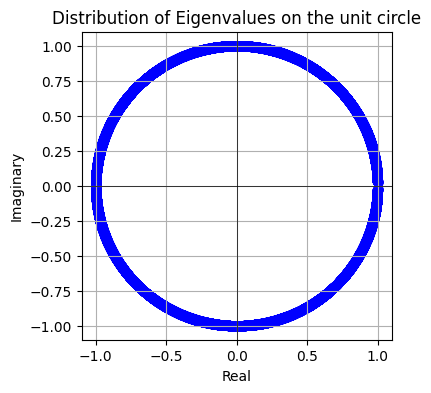

In [50]:
plt.figure(figsize=(4,4))
plt.scatter(np.real(e1), np.imag(e1), color='blue', alpha=0.2)
plt.title(f"Distribution of Eigenvalues on the unit circle")
plt.xlabel("Real")
plt.ylabel("Imaginary")
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid()
plt.show()

(array([0.16246537, 0.16507551, 0.16412058, 0.16418424, 0.16233804,
        0.16412058, 0.16418424, 0.16329297, 0.16361128, 0.16412058,
        0.162911  , 0.16310199, 0.16482086, 0.16081015, 0.16335663,
        0.15928227, 0.15896396, 0.15622649, 0.14909635, 0.10612452,
        0.1063155 , 0.15094255, 0.1552079 , 0.15985522, 0.15998255,
        0.16004621, 0.16329297, 0.16456621, 0.16049184, 0.16526649,
        0.16189241, 0.16335663, 0.16310199, 0.1647572 , 0.16373861,
        0.16386593, 0.1642479 , 0.16373861, 0.16412058, 0.16520283]),
 array([-3.14159265, -2.98451302, -2.82743339, -2.67035376, -2.51327412,
        -2.35619449, -2.19911486, -2.04203522, -1.88495559, -1.72787596,
        -1.57079633, -1.41371669, -1.25663706, -1.09955743, -0.9424778 ,
        -0.78539816, -0.62831853, -0.4712389 , -0.31415927, -0.15707963,
         0.        ,  0.15707963,  0.31415927,  0.4712389 ,  0.62831853,
         0.78539816,  0.9424778 ,  1.09955743,  1.25663706,  1.41371669,
         1.57079

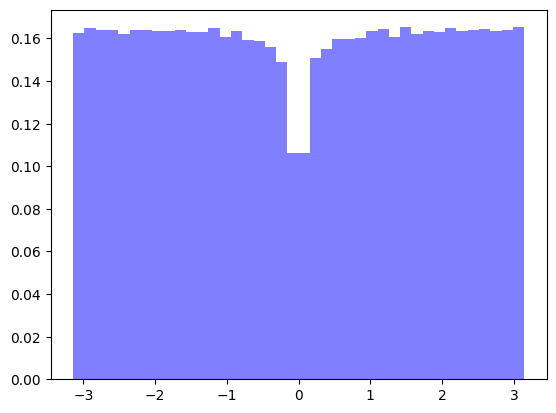

In [54]:
plt.hist(e2,range = [-np.pi,np.pi],  bins=40, density=True, alpha=0.5, color='blue')

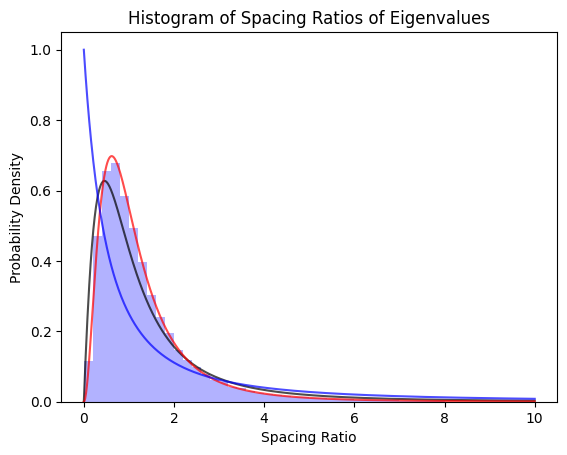

In [55]:
# Plot the spacing ratios
plt.hist(spacing_ratios,range = [0,8],  bins=40, density=True, alpha=0.3, color='blue')
plt.plot(x,prgoe,alpha=0.7, color='black')
plt.plot(x,prgue,alpha=0.7, color='red')
plt.plot(x,prpoi,alpha=0.7, color='blue')
plt.xlabel('Spacing Ratio')
plt.ylabel('Probability Density')
plt.title('Histogram of Spacing Ratios of Eigenvalues')
plt.grid(False)
plt.show()

In [45]:
############## Circular orthogonal ensemble ####################
n = 100
ens = 500  # ens
eigphall = []
eigvals = []
#spacing_ratios = []
# Generate a matrix from the CUE
for i in tqdm(range(ens)):
    cse = CircularEnsemble(beta=4, n = n)
    Hcse = cse.matrix
    eig = nlg.eigvals(Hcse)
    eigph = np.angle(eig)
    eigso = np.sort(eigph)
    # for j in range(len(eig)-2):
    # #spacings = np.diff(eigs)
    #     sratio = (eigso[j+2]-eigso[j+1])/(eigso[j+1]-eigso[j])
    #     spacing_ratios.append(sratio)
    eigvals.append(eig)
    eigphall.append(eigph)

  0%|          | 0/500 [00:00<?, ?it/s]

In [56]:
e1 = np.array(eigvals).flatten()
e2 = np.array(eigphall).flatten()

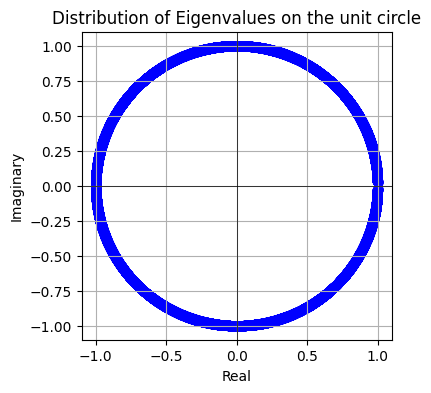

In [57]:
plt.figure(figsize=(4,4))
plt.scatter(np.real(e1), np.imag(e1), color='blue', alpha=0.2)
plt.title(f"Distribution of Eigenvalues on the unit circle")
plt.xlabel("Real")
plt.ylabel("Imaginary")
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid()
plt.show()